Extract Sv from Polar Front data
This notebook will be used to calculate the mean backscatter value for the 2021 and 2022 data from the Sailbuoy surveys at the Polar Front area in the Barents Sea. This notebook uses the function developed in 2013-2014ANMPA.

In [1]:
import glob
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['font.size']= 15
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 15

## Load datasets

### Iskant 2021

In [3]:
# make a list of filenames
data_path = "E:/PolarFront-Exports/Iskant2021/ExtractSv/"
csv_file_names = sorted(glob.glob(data_path + 'Mission Plan ES200-7CDK-split-PolarFront-Phase0-D2021*.csv'))

# Combine files
Iskant_21 = pd.concat([pd.read_csv(f, skiprows=0) for f in csv_file_names[:-2]], axis=0)

# Combine date and time column
Iskant_21['datetime'] = pd.to_datetime(Iskant_21['Date_M'].apply(str) + Iskant_21['Time_M'], format='%Y%m%d %H:%M:%S.%f')
Iskant_21['platform'] = 'Sailbuoy Iskant 2021'

In [4]:
Iskant_21 = Iskant_21[Iskant_21['Exclude_above_line_range_mean']>-100]

### Iskant 2022

In [62]:
# make a list of filenames
data_path = "E:/PolarFront-Exports/Iskant2022/ExtractSv/"
csv_file_names = sorted(glob.glob(data_path + '*-Phase0-D2022*.csv'))

# Combine files
Iskant_22 = pd.concat([pd.read_csv(f, skiprows=0) for f in csv_file_names], axis=0)

# Combine date and time column
Iskant_22['datetime'] = pd.to_datetime(Iskant_22['Date_M'].apply(str) + Iskant_22['Time_M'], format='%Y%m%d %H:%M:%S.%f')

Iskant_22['platform'] = 'Sailbuoy Iskant 2022'

In [58]:
Iskant_22 = Iskant_22[Iskant_22['Exclude_above_line_range_mean']>-100]

### Echo 1 2022

In [35]:
# make a list of filenames
data_path = "E:/PolarFront-Exports/Echo2022/ExtractSv/"
csv_file_names = sorted(glob.glob(data_path + '*-Phase0-D2022*.csv'))

# Combine files
Echo_22 = pd.concat([pd.read_csv(f, skiprows=0) for f in csv_file_names[:-1]], axis=0)

# Combine date and time column
Echo_22['datetime'] = pd.to_datetime(Echo_22['Date_M'].apply(str) + Echo_22['Time_M'], format='%Y%m%d %H:%M:%S.%f')

Echo_22['platform'] = 'Sailbuoy Echo 2022'

In [36]:
Echo_22 = Echo_22[Echo_22['Exclude_above_line_range_mean']>-100]

# combine data streams into one dataframe

In [60]:
PF_SB = pd.concat([Echo_22, Iskant_21,Iskant_22])
# Save dataframe to use in map.
PF_SB = PF_SB.reset_index()
PF_SB.to_feather('E:/PolarFront-Exports/Svmean50.feather')

PF_SB['MonthDay'] = PF_SB['datetime'].dt.strftime('%m%d')

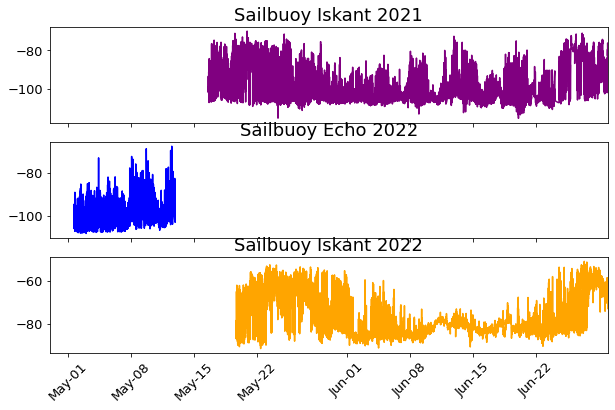

In [43]:
fig, ax = plt.subplots(3,figsize=(10,6))
for ind in range(0,3):
    platform_names = ['Sailbuoy Iskant 2021','Sailbuoy Echo 2022','Sailbuoy Iskant 2022']
    color_set = ['purple', 'blue', 'orange']
    PF_SB_plat = PF_SB[PF_SB['platform']==platform_names[ind]]
    ax[ind].plot(PF_SB_plat.datetime, PF_SB_plat.Sv_mean,color_set[ind])
    ax[ind].set_title(platform_names[ind])

ax[0].set_xlim([dt.datetime(2021,4,29),dt.datetime(2021,6,30)])
ax[1].set_xlim([dt.datetime(2022,4,29),dt.datetime(2022,6,30)])
ax[2].set_xlim([dt.datetime(2022,4,29),dt.datetime(2022,6,30)])
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].tick_params(axis='x', rotation=45)
ax[2].xaxis.set_major_formatter(DateFormatter("%b-%d"))

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/Sailbuoy_Sv.png', dpi = 300, facecolor='w', transparent=False)

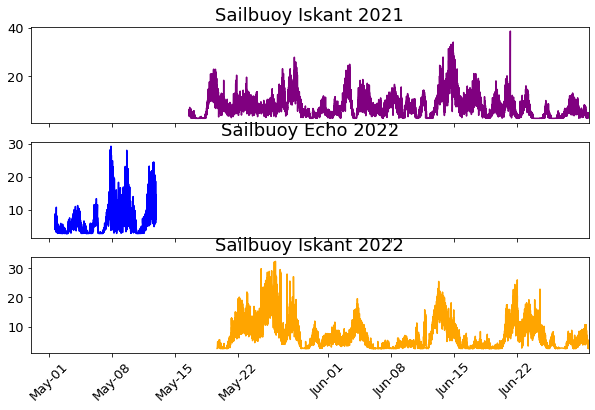

In [73]:
fig, ax = plt.subplots(3,figsize=(10,6))
for ind in range(0,3):
    platform_names = ['Sailbuoy Iskant 2021','Sailbuoy Echo 2022','Sailbuoy Iskant 2022']
    color_set = ['purple', 'blue', 'orange']
    PF_SB_plat = PF_SB[PF_SB['platform']==platform_names[ind]]
    ax[ind].plot(PF_SB_plat.datetime, 50-PF_SB_plat.Height_mean,color_set[ind])
    ax[ind].set_title(platform_names[ind])

ax[0].set_xlim([dt.datetime(2021,4,29),dt.datetime(2021,6,30)])
ax[1].set_xlim([dt.datetime(2022,4,29),dt.datetime(2022,6,30)])
ax[2].set_xlim([dt.datetime(2022,4,29),dt.datetime(2022,6,30)])
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].tick_params(axis='x', rotation=45)
ax[2].xaxis.set_major_formatter(DateFormatter("%b-%d"))

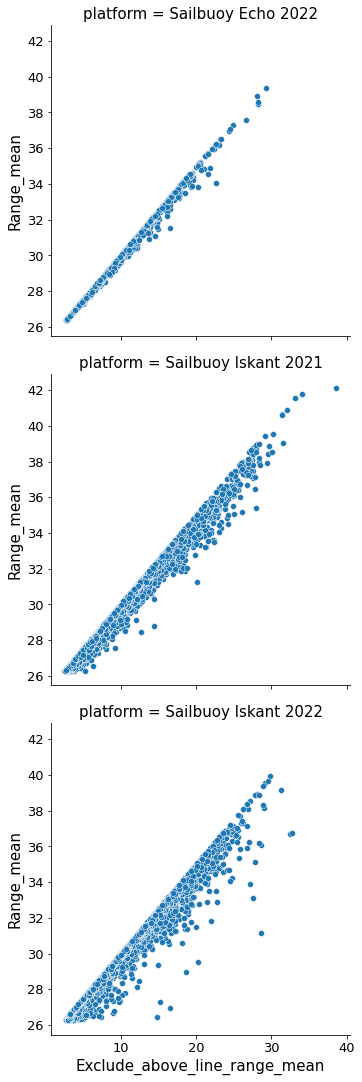

In [61]:
sns.relplot(data=PF_SB, x='Height_mean', y='Range_mean', row = 'platform')
#sns.lineplot(data=Iskant_21, x='datetime', y='Sv_mean', hue='Layer_depth_min')
#date_form = DateFormatter("%b %d")
#ax.xaxis.set_major_formatter(date_form)

In [72]:
50-Iskant_22.Height_mean- Iskant_22.Exclude_above_line_range_mean

0      10001.511389
1      10001.511389
2      10001.511389
3      10001.511389
4      10001.511389
           ...     
141       -0.054170
142       -1.320532
143       -0.054169
144       -0.054170
145       -0.054169
Length: 21678, dtype: float64

In [56]:
PF_SB.columns

Index(['index', 'Process_ID', 'Interval', 'Layer', 'Sv_mean', 'NASC',
       'Height_mean', 'Depth_mean', 'Layer_depth_min', 'Layer_depth_max',
       'Ping_S', 'Ping_E', 'Dist_M', 'Date_M', 'Time_M', 'Lat_M', 'Lon_M',
       'Noise_Sv_1m', 'Minimum_Sv_threshold_applied',
       'Maximum_Sv_threshold_applied', 'Standard_deviation', 'Thickness_mean',
       'Range_mean', 'Exclude_below_line_range_mean',
       'Exclude_above_line_range_mean', 'Center_of_mass', 'Inertia',
       'Proportion_occupied', 'Equivalent_area', 'Aggregation_index',
       'datetime', 'platform', 'MonthDay'],
      dtype='object')